8기_최준혁

# 필요 라이브러리 호출하기

pandas, numpy 등 데이터 읽기에 필요한 라이브러리를 호출해줍니다. 

In [55]:
#필요 라이브러리 호출
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 파일 읽기

pandas의 read_csv를 활용하여 csv 파일을 데이터프레임 형태로 불러옵니다.

In [56]:
#파일 불러오기
data = pd.read_csv("./FIFA.csv", 
                  index_col = None)

In [57]:
df = data.copy()

## 데이터 구조 확인

                                                      <데이터 변수 설명>

| 변수 | 설명 
| --- | --- | 
| id | 선수 고유의 아이디 |  
| name | 이름 |
| age | 나이 |
| continent | 선수들의 국적이 포함되어 있는 대륙 | 
| contract_until | 선수의 계약기간 만료시기 |  
| position | 선수가 선호하는 포지션 ex) 공격수, 수비수|  
| prefer_foot | 선수가 선호하는 발 ex) 오른발 |  
| reputation | 선수가 유명도 - 높은 수치일 수록 유명한 선수 |  
| stat_overall | 선수의 현재 능력치 |  
| stat_potential | 선수가 경험 및 노력을 통해 발전할 수 있는 정도 |  
| stat_skill_moves | 선수의 개인기 능력치 |  
| value | FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) |  


df.head(), df.describe(), df.info()로 전반적인 데이터프레임의 구조를 확인해볼 수 있습니다. 

In [58]:
# dataframe.head()
# 데이터프레임 상위 5개 행 확인
df.head(5)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,11784.0,T. Lindenhahn,27,europe,2021,DF,?,1,63.0,63.0,3,300000
1,2436.0,V. Misidjan,24,europe,2021,MF,?,1,74.0,77.0,3,7000000
2,8196.0,S. Aresti,32,europe,2020,GK,?,1,67.0,67.0,1,450000
3,16446.0,H. Al Ruwaili,23,asia,2020,DF,?,1,53.0,60.0,2,70000
4,7388.0,E. Soriano,29,europe,2019,ST,?,1,67.0,67.0,2,750000


**과제 1: 데이터프레임 하위 7개 행을 확인해보세요!**

In [59]:
# 데이터프레임 하위 7개 행 확인
df.tail(7)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
8925,7805.0,C. Sepúlveda,26,south america,2019,MF,right,1,67.0,72.0,2,850000
8926,10746.0,I. Abass,19,africa,2023,ST,right,1,64.0,77.0,3,850000
8927,5424.0,D. Odoi,30,europe,2019,DF,right,1,69.0,69.0,3,775000
8928,16664.0,M. Tilio,16,oceania,2019,MF,left,1,52.0,69.0,2,100000
8929,13515.0,V. Myhra,21,europe,2018,GK,right,1,61.0,72.0,1,350000
8930,876.0,R. Vormer,30,europe,2022,MF,right,2,78.0,78.0,3,9500000
8931,13317.0,H. Eisa,25,africa,2019,ST,right,1,61.0,NaN,2,350000


# 결측치 처리

## 결측치 확인
dataframe.info()를 통해서 데이터프레임의 자료형, 결측치 개수를 알 수 있습니다.

In [60]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8756 non-null   float64
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   int64  
 8   stat_overall      8802 non-null   float64
 9   stat_potential    7140 non-null   float64
 10  stat_skill_moves  8932 non-null   int64  
 11  value             8932 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [61]:
# 결측치 확인
df.isnull().sum()

id                   176
name                   0
age                    0
continent              0
contract_until         0
position               0
prefer_foot            0
reputation             0
stat_overall         130
stat_potential      1792
stat_skill_moves       0
value                  0
dtype: int64

- df.info(), df.isnull().sum으로 확인해 본 결과, id, stat_overall, stat_potential에 결측치가 존재하는 것을 알 수 있습니다.<br>
- name, continent, contract_until, position, prefer_foot의 데이터 타입인 object는 pandas에서 문자열 type라고 생각해주시면 됩니다.<br>

그럼 결측치가 존재하는 id, stat_overall, stat_potential의 결측치를 처리하는 과정을 각각 진행해보도록 하겠습니다.

**과제2: describe을 활용해 데이터의 평균, 4분위수, 최소값, 최대값을 확인해보세요!** 

In [62]:
#데이터프레임 각 칼럼의 통계치 확인
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8756.000000,8932.000000,8932.000000,8802.000000,7140.000000,8932.000000,8.932000e+03
mean,7972.833029,25.209136,1.130878,67.100091,72.003081,2.401702,2.778673e+06
std,4842.075657,4.635515,0.423792,6.854393,5.981808,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3755.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7707.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12084.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


## id
id column은 value를 예측하는데 도움이 되지 않기 때문에 해당 column 전체를 삭제합니다.<br>


**과제 3: id column 전체를 삭제해보세요!(Hint: df.drop을 활용해보세요)**

In [63]:
df.drop(['id'], axis = 1, inplace = True)

## prefer_foot

value_counts를 통해 prefer_foot의 value 및 결측치의 개수를 확인하고, 최빈값으로 대체함으로써 결측치를 처리해줍니다.

**과제 4: 결측치를 최빈값으로 대체해보세요!**

In [64]:
#결측치를 최빈값인 right로 대체
df = df.replace({'prefer_foot' :'?'}, 'right')

In [65]:
#결측치 처리 확인
df[['prefer_foot']].value_counts()

prefer_foot
right          6952
left           1980
dtype: int64

## stat_potential
stat_potential, stat_overall 간의 관계를 파악하고, 상관계수가 높다면 각각의 값을 이용하는 방법으로 결측치를 처리해줍니다.

상관관계를 확인할 때, 시각화를 이용하기 위해 시각화를 위한 라이브러리를 불러옵니다.

In [66]:
#시각화를 위해 matplotlib 호출

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

scatter plot, heatmap을 이용해 두 변수 간 상관관계를 확인해줍니다.

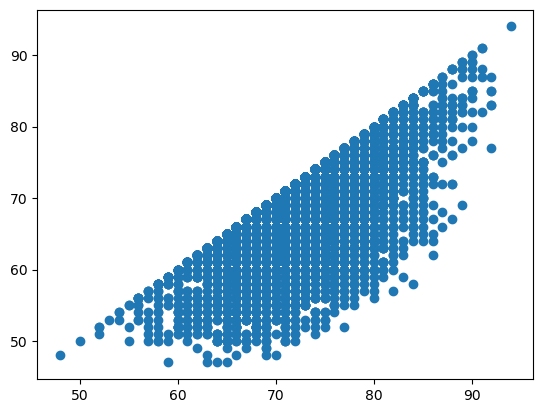

In [67]:
# scatterplot을 통해 상관관계 확인

plt.scatter(df.stat_potential, df.stat_overall)

<AxesSubplot:>

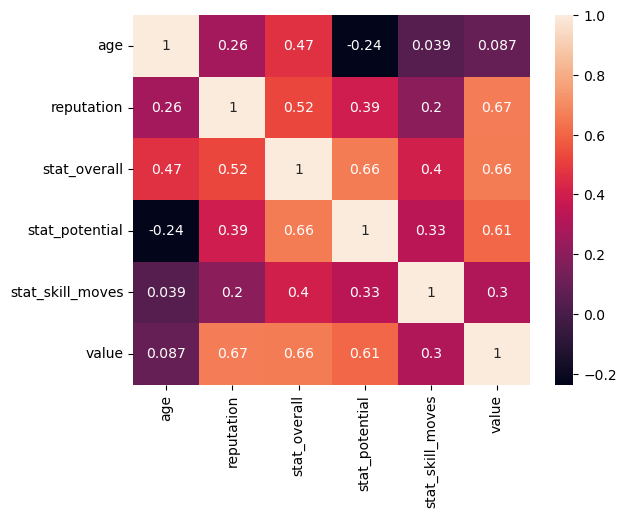

In [68]:
# heatmap을 통해 상관계수 파악

sns.heatmap(df.corr(),
            annot = True)

- scatter plot을 봤을 때 두 변수간 선형 관계가 존재하고, heatmap에서도 상관계수가 0.66임을 알 수 있기 때문에 각각의 값으로 대체함으로써 결측치를 처리해줍니다.

In [69]:
#각각의 값으로 대체

df = df.fillna({'stat_potential':df['stat_overall']})
df = df.fillna({'stat_overall':df['stat_potential']})

In [70]:
#결측치 처리 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8932 non-null   object 
 1   age               8932 non-null   int64  
 2   continent         8932 non-null   object 
 3   contract_until    8932 non-null   object 
 4   position          8932 non-null   object 
 5   prefer_foot       8932 non-null   object 
 6   reputation        8932 non-null   int64  
 7   stat_overall      8912 non-null   float64
 8   stat_potential    8912 non-null   float64
 9   stat_skill_moves  8932 non-null   int64  
 10  value             8932 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 767.7+ KB


-  stat_overall과 stat_potential 모두 결측치가 존재하는 row는 20개입니다. 따라서, 최종적으로 결측치 20개가 존재합니다.
-  값을 삭제해도 모델 학습에 큰 무리가 없으므로, 해당 row를 삭제함으로써 결측치를 처리해줍니다.

In [71]:
#결측치 삭제
df.dropna(how = 'any', inplace = True)

In [72]:
#결측치 처리 결과 확인
df.isnull().sum()

name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

# EDA

우선, EDA를 위해 시각화에 필요한 라이브러리를 호출해줍니다.

In [73]:
#시각화 라이브러리 호출
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

먼저 position별 value의 변화를 나타내주는 factorplot을 그려줍니다.

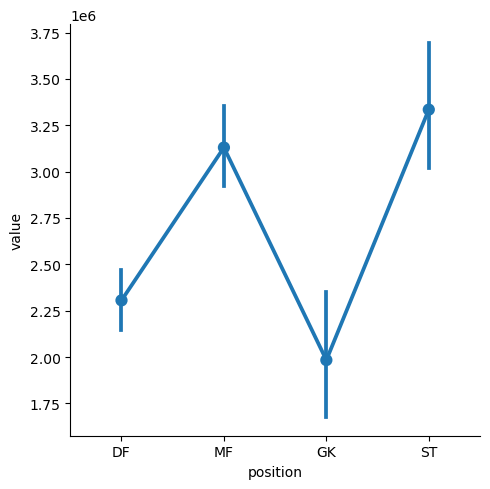

In [74]:
# position별 value의 변화 알아보기
sns.factorplot('position', 'value', data = df)

다음으로, position별 value를 reputation별로 알아보는 EDA를 진행해보도록 하겠습니다.

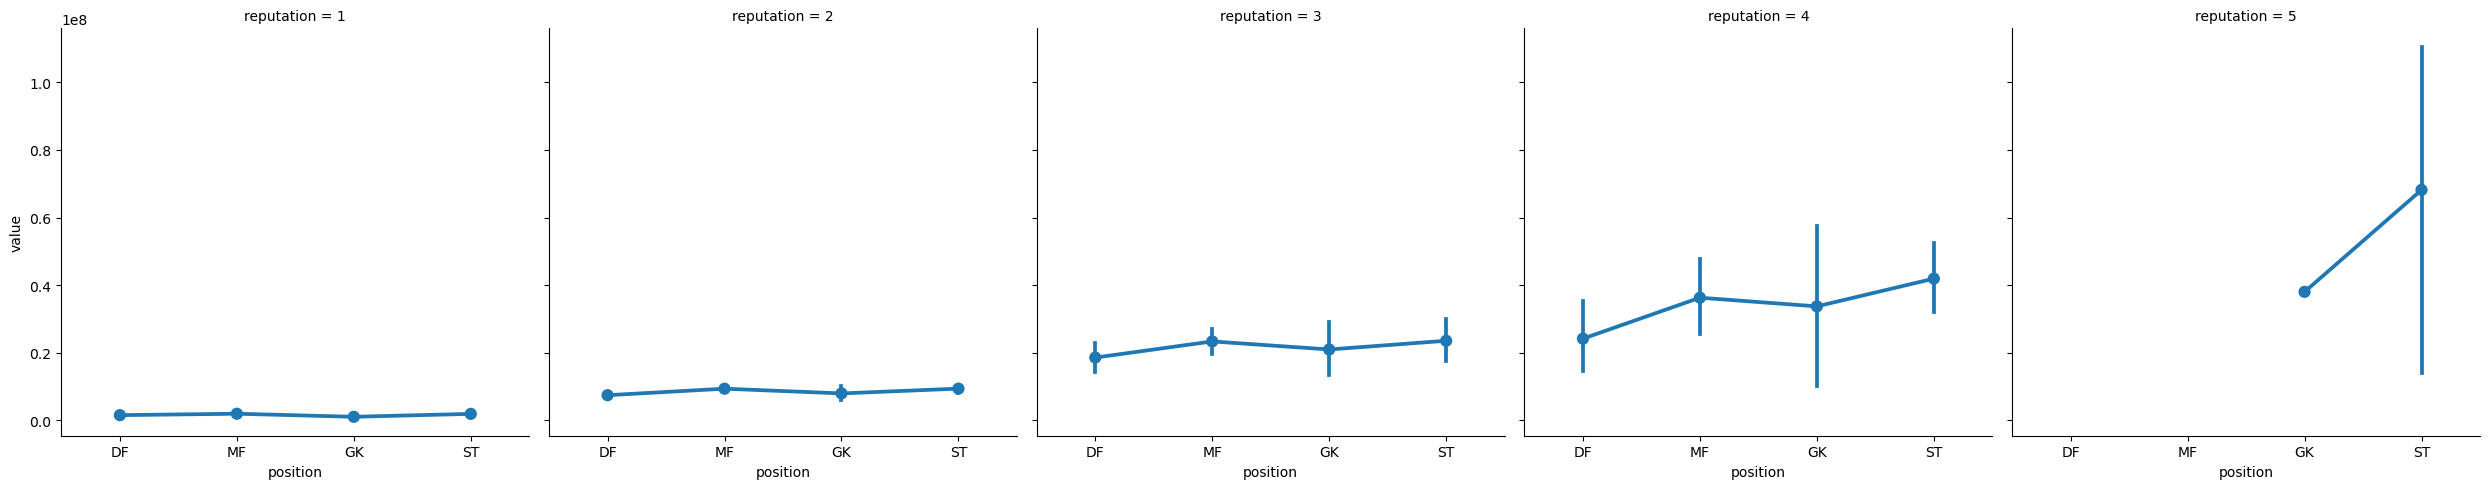

In [75]:
# reputation별로 position별 value의 변화 알아보기

sns.factorplot('position', 'value', col = 'reputation', data = df)

**과제 5: 위의 그래프와 같이, position별 stat_skill_moves의 변화를 알아보기 위해 두 변수 간 factorplot을 그려보세요!**

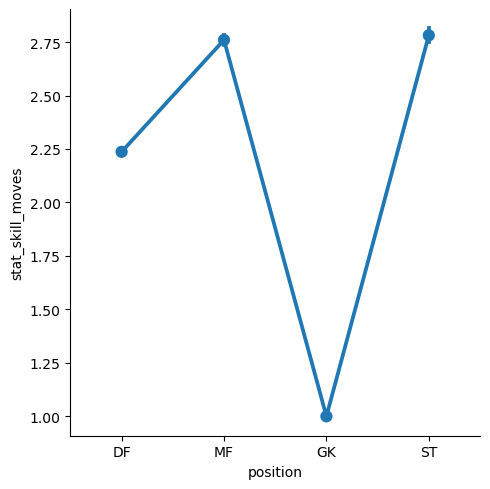

In [76]:
sns.factorplot('position', 'stat_skill_moves', data = df)

<AxesSubplot:xlabel='value', ylabel='Density'>

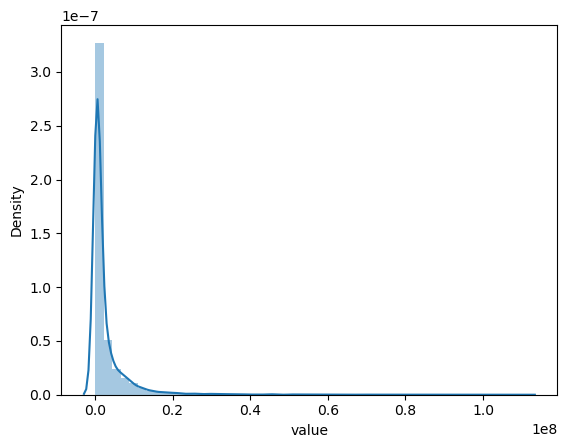

In [77]:
sns.distplot(df['value'])

<AxesSubplot:xlabel='stat_potential', ylabel='Density'>

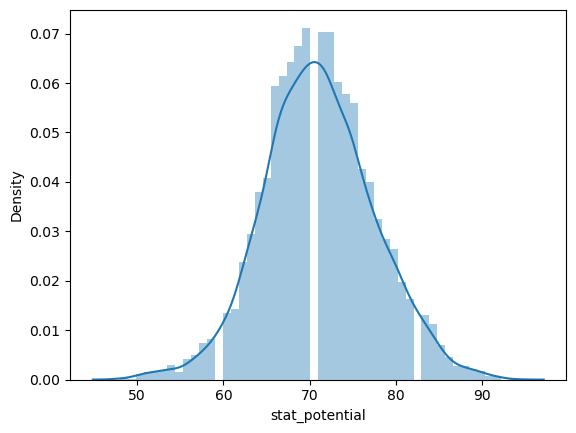

In [78]:
sns.distplot(df['stat_potential'])

**과제 6: 다음으로 position 별 선수의 수를 나타내주는 PieChart와, position별 선수가 선호하는 발의 수를 나타내주는 CountPlot을 함께 그려보세요!**

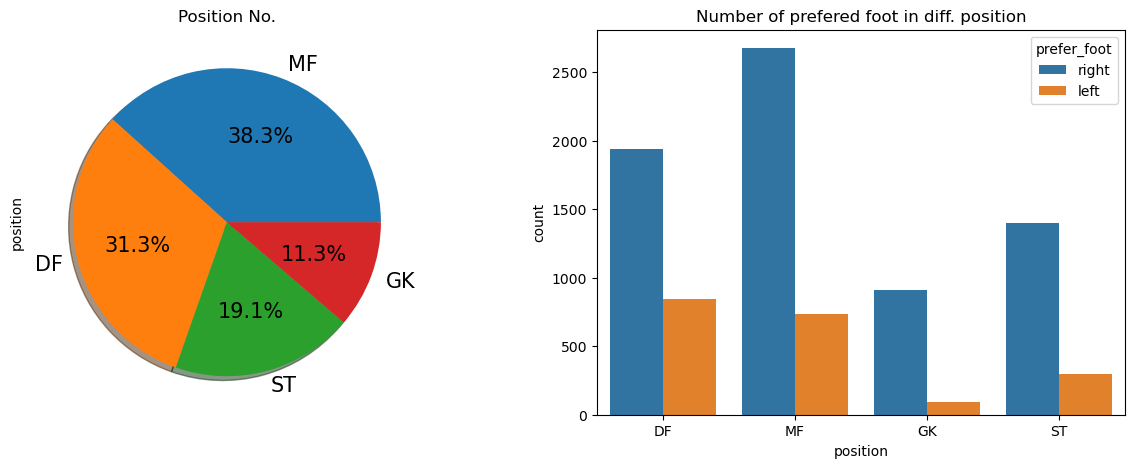

In [79]:
f, ax = plt.subplots(1,2, figsize=(15, 5))

df['position'].value_counts().plot.pie(autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True,
                                         fontsize=15)
ax[0].set_title('Position No.')

sns.countplot('position', hue='prefer_foot', data=df, ax=ax[1]) 
ax[1].set_title('Number of prefered foot in diff. position')


plt.show()

# 회귀분석

먼저, data를 분리하기위한 train_test_split, data scaling을 위한 StandardScaler, 회귀분석을 위한 ols 등 회귀분석에 필요한 라이브러리를 호출합니다.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.regression import linear_model
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols
import statsmodels.api as sm

## 회귀모델 학습을 위한 전처리

In [81]:
# 선수의 이름은 value를 예측하는데 영향이 없음. 따라서 삭제

df.drop(['name'], axis = 1, inplace = True)

In [82]:
# object 타입을 label encoding과 get_dummies를 통해 변환한다

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8931
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8912 non-null   int64  
 1   continent         8912 non-null   object 
 2   contract_until    8912 non-null   object 
 3   position          8912 non-null   object 
 4   prefer_foot       8912 non-null   object 
 5   reputation        8912 non-null   int64  
 6   stat_overall      8912 non-null   float64
 7   stat_potential    8912 non-null   float64
 8   stat_skill_moves  8912 non-null   int64  
 9   value             8912 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 765.9+ KB


In [83]:
df.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,27,europe,2021,DF,right,1,63.0,63.0,3,300000
1,24,europe,2021,MF,right,1,74.0,77.0,3,7000000
2,32,europe,2020,GK,right,1,67.0,67.0,1,450000
3,23,asia,2020,DF,right,1,53.0,60.0,2,70000
4,29,europe,2019,ST,right,1,67.0,67.0,2,750000


In [84]:
q1 = 375000      # 1분위수
q3 = 2600000     # 3분위수

# tukey fences를 이용해 이상치 제거
df = df[(df['value'] > (q1-1.5*(q3-q1))) & (df['value'] < (q3+1.5*(q3-q1)))]
df.reset_index(inplace = True)

In [85]:
# position과 prefer_foot을 get_dummies를 통해 변환한다

df1 = pd.get_dummies(df, 
                     columns = ['position', 'prefer_foot'],
                     drop_first = False)

In [86]:
# 종속변수와 독립변수를 지정한다

df1_y = df1['value']
df1_x = df1.drop(['index','continent','value', 'contract_until'], axis = 1)

In [87]:
df1_x.head(10)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,27,1,63.0,63.0,3,1,0,0,0,0,1
1,32,1,67.0,67.0,1,0,1,0,0,0,1
2,23,1,53.0,60.0,2,1,0,0,0,0,1
3,29,1,67.0,67.0,2,0,0,0,1,0,1
4,23,1,58.0,64.0,3,0,0,1,0,0,1
5,25,1,54.0,57.0,2,1,0,0,0,0,1
6,27,1,66.0,66.0,3,0,0,1,0,0,1
7,21,1,62.0,68.0,3,1,0,0,0,0,1
8,24,1,73.0,78.0,1,0,1,0,0,0,1
9,25,1,73.0,77.0,3,0,0,0,1,0,1


# 선형회귀

## 다중회귀분석

In [88]:
from statsmodels.regression import linear_model

model = linear_model.OLS(df1_y, df1_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1456.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:18:57   Log-Likelihood:            -1.1575e+05
No. Observations:                7735   AIC:                         2.315e+05
Df Residuals:                    7725   BIC:                         2.316e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age               -7.797e+04   2823.931    -27.609      0.000   -8.35e+04   -7.24e+04
reputation         5.616e+05   4.02e+04     13.972      0.000    4.83e+05     6.4e+05
stat_overall       1.845e+05   2849.497     64.751      0.000    1.79e+05     1.9e+05
stat_potential     8277.7422   2365.953      3.499      0.000    3639.833    1.29e+04
stat_skill_moves   1.305e+05   1.98e+04      6.591      0.000    9.17e+04    1.69e+05
position_DF       -3.578e+06   4.48e+04    -79.906      0.000   -3.67e+06   -3.49e+06
position_GK       -3.345e+06   5.13e+04    -65.189      0.000   -3.45e+06   -3.24e+06
position_MF       -3.515e+06    4.5e+04    -78.102      0.000    -3.6e+06   -3.43e+06
position_ST       -3.458e+06   4.67e+04    -74.059      0.000   -3.55e+06   -3.37e+06
prefer_foot_left  -6.971e+06   8.55e+04    -81.553      0.000   -7.14e+06    -6.8e+06
prefer_foot_right -6.926e+06    8.4e+04    -82.408      0.000   -7.09e+06   -6.76e+06
==============================================================================
Omnibus:                     1659.957   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3871.222
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       5.490   Cond. No.                     9.34e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- R square 값이 0.63
- 변수선택법을 이용한 뒤, R_square 값을 다시 확인해보자!!

## 변수 선택법

In [89]:
import statsmodels.api as sm

variables = df1_x.columns.tolist() ## 설명 변수 리스트 / 반응변수는 df1_y

backward_selected = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(backward_selected) > 0:
    X = sm.add_constant(df1[backward_selected])
    p_vals = sm.OLS(df1_y, X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        backward_selected.remove(remove_variable)
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df1[backward_selected])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(backward_selected.copy())
    else:
        break

In [90]:
model = linear_model.OLS(df1_y, df1[backward_selected]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1456.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:18:57   Log-Likelihood:            -1.1575e+05
No. Observations:                7735   AIC:                         2.315e+05
Df Residuals:                    7725   BIC:                         2.316e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age               -7.797e+04   2823.931    -27.609      0.000   -8.35e+04   -7.24e+04
reputation         5.616e+05   4.02e+04     13.972      0.000    4.83e+05     6.4e+05
stat_overall       1.845e+05   2849.497     64.751      0.000    1.79e+05     1.9e+05
stat_potential     8277.7422   2365.953      3.499      0.000    3639.833    1.29e+04
stat_skill_moves   1.305e+05   1.98e+04      6.591      0.000    9.17e+04    1.69e+05
position_DF       -3.578e+06   4.48e+04    -79.906      0.000   -3.67e+06   -3.49e+06
position_GK       -3.345e+06   5.13e+04    -65.189      0.000   -3.45e+06   -3.24e+06
position_MF       -3.515e+06    4.5e+04    -78.102      0.000    -3.6e+06   -3.43e+06
position_ST       -3.458e+06   4.67e+04    -74.059      0.000   -3.55e+06   -3.37e+06
prefer_foot_left  -6.971e+06   8.55e+04    -81.553      0.000   -7.14e+06    -6.8e+06
prefer_foot_right -6.926e+06    8.4e+04    -82.408      0.000   -7.09e+06   -6.76e+06
==============================================================================
Omnibus:                     1659.957   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3871.222
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       5.490   Cond. No.                     9.34e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- 결과값이 차이가 없다...
- 기본 OLS로 진행한다

# 로지스틱 회귀 / 소프트맥스

In [91]:
lr_df = data.copy()
len(lr_df)

8932

In [92]:
lr_df_y = df1['value']
lr_df_x = df1.drop(['index','continent', 'value', 'contract_until'], axis = 1)

In [93]:
# 종속변수를 연속형 변수에서 범주형 변수로 변환

bins_label = ['value0','value1','value2','value3','value4','value5','value6']
lr_df_y = pd.cut(lr_df_y, 7, right=False, labels=bins_label)

In [94]:
# 종속변수 값 분포 확인

lr_df_y.value_counts()

value0    4349
value1    1630
value2     524
value3     441
value4     329
value5     238
value6     224
Name: value, dtype: int64

In [95]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time

train_X, test_X, train_y, test_y = train_test_split(lr_df_x, lr_df_y, random_state=42)

start = time.time()

lr_clf = LogisticRegression(C=20, max_iter=1000)
lr_clf.fit(train_X, train_y)
lr_preds = lr_clf.predict(test_X)

end = time.time()

print(lr_clf.score(train_X, train_y).round(3))
print(lr_clf.score(test_X, test_y).round(3))
no_pca_time = end-start
# 0.709
# 0.717

0.709
0.718


**과제 7: statsmodels 모듈을 이용해서 선형다중회귀분석을 시행하고, 결과를 해석해보세요!**

In [96]:
from statsmodels.regression import linear_model

model = linear_model.OLS(df1_y, df1_x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     1456.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:19:01   Log-Likelihood:            -1.1575e+05
No. Observations:                7735   AIC:                         2.315e+05
Df Residuals:                    7725   BIC:                         2.316e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age               -7.797e+04   2823.931    -27.609      0.000   -8.35e+04   -7.24e+04
reputation         5.616e+05   4.02e+04     13.972      0.000    4.83e+05     6.4e+05
stat_overall       1.845e+05   2849.497     64.751      0.000    1.79e+05     1.9e+05
stat_potential     8277.7422   2365.953      3.499      0.000    3639.833    1.29e+04
stat_skill_moves   1.305e+05   1.98e+04      6.591      0.000    9.17e+04    1.69e+05
position_DF       -3.578e+06   4.48e+04    -79.906      0.000   -3.67e+06   -3.49e+06
position_GK       -3.345e+06   5.13e+04    -65.189      0.000   -3.45e+06   -3.24e+06
position_MF       -3.515e+06    4.5e+04    -78.102      0.000    -3.6e+06   -3.43e+06
position_ST       -3.458e+06   4.67e+04    -74.059      0.000   -3.55e+06   -3.37e+06
prefer_foot_left  -6.971e+06   8.55e+04    -81.553      0.000   -7.14e+06    -6.8e+06
prefer_foot_right -6.926e+06    8.4e+04    -82.408      0.000   -7.09e+06   -6.76e+06
==============================================================================
Omnibus:                     1659.957   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3871.222
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                       5.490   Cond. No.                     9.34e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.71e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**과제 8: train_test_split을 이용해 train 데이터와 test 데이터로 분리해보세요!**

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(lr_df_x, lr_df_y, random_state=42)

**과제 9: 로지스틱 회귀 모형을 생성하고, train 데이터로 모델을 학습시킨 뒤, test 데이터를 통해 예측해보세요!**

In [98]:
lr_clf = LogisticRegression(C=20, max_iter=1000)
lr_clf.fit(train_X, train_y)
lr_preds = lr_clf.predict(test_X)

**과제 10: score()을 통해 로지스틱 회귀 모형의 정확도를 확인해보세요!**

In [99]:
# 로지스틱 회귀 모형 결과확인

print(lr_clf.score(train_X, train_y).round(3))
print(lr_clf.score(test_X, test_y).round(3))
# 0.702
# 0.713

0.709
0.718


# PCA

**과제 11: 먼저 표준화를 진행해줍니다!(Hint: MinMaxScaler or StandardScaler 등을 이용해보세요!)**

In [100]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.decomposition import PCA
import time

scale_x = MinMaxScaler().fit_transform(df1_x)

그리고 scree plot을 그려줍니다.

In [101]:
features = list(df1_x.columns)
pd.DataFrame(scale_x, columns = features).head()

,age,reputation,stat_overall,stat_potential,stat_skill_moves,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,0.458333,0.0,0.390244,0.365854,0.50,1.0,0.0,0.0,0.0,0.0,1.0
1,0.666667,0.0,0.487805,0.463415,0.00,0.0,1.0,0.0,0.0,0.0,1.0
2,0.291667,0.0,0.146341,0.292683,0.25,1.0,0.0,0.0,0.0,0.0,1.0
3,0.541667,0.0,0.487805,0.463415,0.25,0.0,0.0,0.0,1.0,0.0,1.0
4,0.291667,0.0,0.268293,0.390244,0.50,0.0,0.0,1.0,0.0,0.0,1.0


In [102]:
pca_all=PCA(n_components = len(df1_x.columns))
pca_all_fit = pca_all.fit_transform(df1_x)

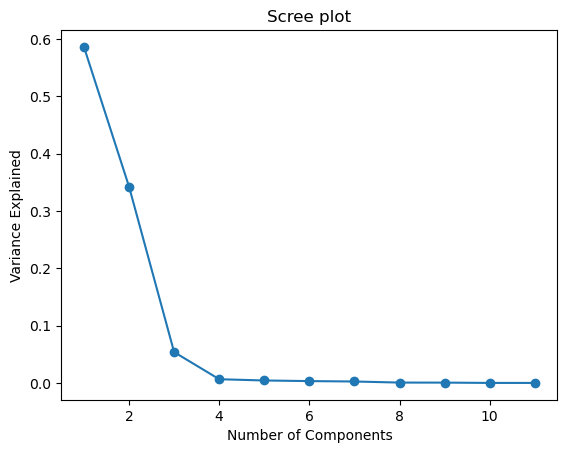

In [103]:
#Scree plot
value_number = np.arange(pca_all.n_components) + 1
plt.title('Scree plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.plot(value_number, pca_all.explained_variance_ratio_, 'o-')

**과제 12: 제시된 scree plot을 보고 주성분 개수를 정해서, pca를 진행해보세요!**

In [104]:
pca = PCA(n_components = 3)
pcaComponents = pca.fit_transform(df1_x)

In [105]:
# 주성분으로 이루어진 데이터 프레임을 구성하세요
principalDf = pd.DataFrame(data = pcaComponents, 
                           columns = ['pca_component1','pca_component2','pca_component3'])
principalDf['target'] = lr_df_y
principalDf.head()

,pca_component1,pca_component2,pca_component3,target
0,-5.097058,-5.268871,0.606844,value0
1,1.729789,-7.091212,-2.035024,value0
2,-15.663825,-2.416401,-1.823588,value0
3,0.814291,-4.875995,-0.135914,value0
4,-9.568420,-0.728870,-0.594794,value0


## PCA 이후 로지스틱 회귀 / 소프트맥스

pca를 진행한 데이터를 이용해, 로지스틱 회귀를 하고, 결과를 비교해 봅시다.

In [106]:
train_X, test_X, train_y, test_y = train_test_split(principalDf[principalDf.columns[0:3]], 
                                                    principalDf['target'], 
                                                    random_state=42)

start = time.time()

lr_clf = LogisticRegression(C=20, max_iter=1000)
lr_clf.fit(train_X, train_y)
lr_preds = lr_clf.predict(test_X)

end = time.time()

yes_pca_time = end - start

**과제 13: 모형의 정확도를 확인해보세요!(Hint: score()를 활용해보세요!)**

In [107]:
print(lr_clf.score(train_X, train_y).round(3))
print(lr_clf.score(test_X, test_y).round(3))
# 0.689
# 0.703

0.807
0.814


In [108]:
# PCA를 진행했을 때 걸린 시간과 PCA를 진행하지 않았을 때 걸린 시간을 비교해보세요

print(f'PCA를 진행하지 않은 로지스틱 회귀모형의 소요 시간은 {round(no_pca_time, 3)}초')
print(f'PCA를 진행한 로지스틱 회귀모형의 소요 시간은 {round(yes_pca_time, 3)}초')

PCA를 진행하지 않은 로지스틱 회귀모형의 소요 시간은 2.977초
PCA를 진행한 로지스틱 회귀모형의 소요 시간은 0.686초


## PCA 결과 해석

PCA를 진행하지 않았을 때의 결과가 더 낫다. **그렇다면 PCA를 언제 사용해야 할까?**<br>

- 현재 자신이 분석하는 **데이터와 상황에 따라서 적절하게** 사용. 수백 개가 넘는 feature가 있는 아주 큰 데이터를 생각해보자. feature 간의 관계를 다 파악하고 어떤 독립변수가 설명력이 높은지 찾으려면 시간이 오래 걸릴 수 있다. 각 feature 간 관계를 파악할지라도, 모델이 학습하는데 오랜 시간이 걸린다

- 이때, feature selection, PCA 등 여러 기법을 통해서 유의미한 변수만을 사용한다면 시간을 단축할 수 있다.